In [ ]:
# problem: remove ab aggregates from single positive EVs
# target: 0 for ab aggregates, 1 for EV (classification)

In [1]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [2]:
#AB fitting with curve_fit, bins need to be 200!
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/pbs/20230427 tim4 pbs AB total.csv')

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/control cd9 cd81/wash twice/total.csv')

#discard headers
df_new = df.loc[13:] # 14 for single file, 13 for 'total' file

df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
# print(df1.head())
# print(df1.index[0])
df1=df1.drop(df1.index[0])
# print(df1.head())
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df_0 = df1[(df1['Channel 1 binned counts'] >= 3 )| (df1['Channel 2 binned counts'] >= 3)]  #channel 1 or 2 positive
radius = rslt_df_0[rslt_df_0['radius_of_gyration']<300]['radius_of_gyration']
print('interested particle numbers for ab aggregates')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

interested particle numbers for ab aggregates
2226
median radius of interested particle numbers
18.7336


(array([239., 825., 453., 149.,  88.,  70.,  50.,  38.,  34.,  24.,  24.,
         19.,  16.,  13.,  12.,  10.,   9.,   8.,  14.,   9.,  10.,  13.,
          8.,   5.,   7.,  18.,   4.,   3.,   4.,   4.,   4.,   3.,   5.,
          3.,   4.,   5.,   4.,   4.,   5.,   0.,   0.,   3.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8.343956  ,  13.30308388,  18.26221176,  23.22133964,
         28.18046752,  33.1395954 ,  38.09872328,  43.05785116,
         48.01697904,  52.97610692,  57.9352348 ,  62.89436268,
         67.85349056,  72.81261844,  77.77174632,  82.7308742 ,
         87.69000208,  92.64912996,  97.60825784, 102.56738572,
        107.5265136 , 112.48564148, 117.44476936, 122.40389724,
        127.36302512, 132.322153  , 137.28128088, 142.24040876,
        147.19953664, 152.15866452, 157.1177924 , 162.07692028,
        167.03604816, 171.99517604, 176.95430392, 181.9134318 ,
        186.87255968, 191.83168756, 196.79081544, 201.74994332,
        206.709071

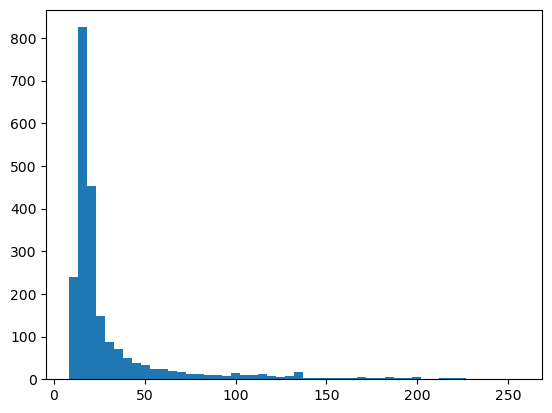

In [3]:
plt.hist(radius,bins=50)

In [4]:
rslt_df_0=rslt_df_0.reset_index(drop=True)
# rslt_df_0=rslt_df_0.drop('index', axis=1)
rslt_df_0['label'] = [0]*len(rslt_df_0)

In [5]:
#EV, double positive particles

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/B1/20230427 tim4 B1 ONI total.csv')

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file

df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df2 = df1[df1.columns].astype(float)

rslt_df_1 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 1&2 positive
radius = rslt_df_1[rslt_df_1['radius_of_gyration']<300]['radius_of_gyration']
# radius = rslt_df['radius_of_gyration']
print(len(rslt_df_1))

8148


(array([ 41., 181., 408., 692., 801., 773., 631., 577., 465., 390., 331.,
        316., 320., 244., 221., 223., 202., 187., 134., 146., 131., 127.,
         95.,  75.,  82.,  66.,  52.,  45.,  44.,  29.,  31.,  23.,  19.,
          8.,   8.,   5.,   6.,   6.,   2.,   2.,   1.,   2.,   1.,   2.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([  8.355216  ,  13.49192828,  18.62864056,  23.76535284,
         28.90206512,  34.0387774 ,  39.17548968,  44.31220196,
         49.44891424,  54.58562652,  59.7223388 ,  64.85905108,
         69.99576336,  75.13247564,  80.26918792,  85.4059002 ,
         90.54261248,  95.67932476, 100.81603704, 105.95274932,
        111.0894616 , 116.22617388, 121.36288616, 126.49959844,
        131.63631072, 136.773023  , 141.90973528, 147.04644756,
        152.18315984, 157.31987212, 162.4565844 , 167.59329668,
        172.73000896, 177.86672124, 183.00343352, 188.1401458 ,
        193.27685808, 198.41357036, 203.55028264, 208.68699492,
        213.823707

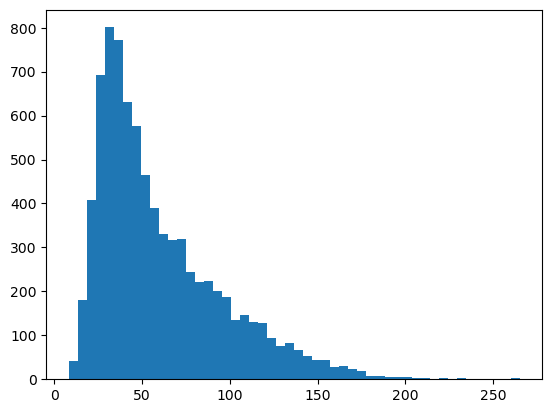

In [6]:
plt.hist(radius,bins=50)

In [7]:
rslt_df_1=rslt_df_1.reset_index(drop=True)
# rslt_df_1=rslt_df_1.drop('index', axis=1)
rslt_df_1['label'] = [1]*len(rslt_df_1)

In [8]:
# split 1 double positive particle to 2 single positive particle and change the feature value
import random
import copy


rslt_df_1_1 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_1['Channel 2 binned counts'] = random_numbers
rslt_df_1_1['Channel 2 positive'] = 0


rslt_df_1_2 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_2['Channel 1 binned counts'] = random_numbers
rslt_df_1_2['Channel 1 positive'] = 0

In [9]:
# training data: test data = 4:1
n_0 = int(len(rslt_df_0)*4/5)
n_1 = int(len(rslt_df_1)*4/5)

In [10]:
train_0 = rslt_df_0.iloc[:n_0,:]

train_2 = rslt_df_1_1.iloc[:n_1,:]
train_3 = rslt_df_1_2.iloc[:n_1,:]
train_total = pd.concat([train_0,train_2,train_3]).reset_index(drop=True)
train = train_total.sample(frac=1, random_state=42).reset_index(drop=True)
# train = train_total

In [11]:
test_0 = rslt_df_0.iloc[n_0:,:]
# test_1 = rslt_df_1.iloc[n_1:,:]
test_2 = rslt_df_1_1.iloc[n_1:,:]
test_3 = rslt_df_1_2.iloc[n_1:,:]
test_total = pd.concat([test_0,test_2,test_3]).reset_index(drop=True)
test = test_total.sample(frac=1, random_state=42).reset_index(drop=True)
# test = test_total

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.base import TransformerMixin

class Transformer():

    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y=None):
        '''
        Get mean
        Input: X datafrome
        '''
        

    def transform(self, X, y=None):
        '''
        Transform data and fill na with mean
        Input: X dataframe
        '''
        df = pd.DataFrame()
        
        df['num_localisations']=X['num_localisations']
        df['skew']=X['skew']
        df['circularity']=X['circularity']
        df['density']=X['density']
        df['convex_hull_area']=X['convex_hull_area']
        df['discretised_area']=X['discretised_area']
        df['radius_of_gyration']=X['radius_of_gyration']
        df['length']=X['length']
        df['distance_birth']=X['distance_birth']
        df['distance_death']=X['distance_death']
        df['Channel 1 binned counts'] = X['Channel 1 binned counts']
        df['Channel 2 binned counts'] = X['Channel 2 binned counts']
      
        return df

    
 
    def fit_transform(self, X, y=None):
        '''
        Combine fit and transform
        Input: X dataframe
        '''        
        self.fit(X)
        return self.transform(X)
          

In [14]:
# df_copy.tail(20)
features = list(train.columns)
target = 'label'
features.remove(target)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('tf', Transformer()),
    ('scaler', MinMaxScaler()),       # Apply MinMaxScaler
    ('classifier', LogisticRegression(class_weight = 'balanced'))
#     ('classifier', LogisticRegression())
])

In [16]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

import matplotlib.pylab as plt
%matplotlib inline

'''Train'''

y_train_pred = pipeline.predict(X_train)
# plt.scatter(y_train, y_train_pred, alpha=0.3)

'''Test'''

y_test_pred = pipeline.predict(X_test)
# plt.scatter(y_test, y_test_pred, alpha=0.3)


In [17]:
from sklearn.metrics import accuracy_score

# Compute accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print accuracy score
print("Accuracy:", accuracy_train)
print("Accuracy:", accuracy_test)




Accuracy: 0.9541742592967537
Accuracy: 0.9751753912574204


In [18]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_train, y_train_pred)

# Print classification report
print(report)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print(report)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm1 = confusion_matrix(y_train, y_train_pred)
cm2 = confusion_matrix(y_test, y_test_pred)


# Print confusion matrix
print(cm1)
print(cm2)


              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1781
           1       0.99      0.96      0.97     13036

    accuracy                           0.95     14817
   macro avg       0.87      0.95      0.90     14817
weighted avg       0.96      0.95      0.96     14817

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       446
           1       0.99      0.98      0.99      3260

    accuracy                           0.98      3706
   macro avg       0.92      0.97      0.94      3706
weighted avg       0.98      0.98      0.98      3706

[[ 1676   105]
 [  574 12462]]
[[ 430   16]
 [  76 3184]]


In [19]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels

rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = pd.concat([rslt_df1,rslt_df2]).reset_index(drop=True)

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())




interested particle numbers for channel 2/CD9 single positive
12734
median radius of interested particle numbers
36.304525


In [20]:
# Predict single positive particle is EV or AB aggregates
X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

In [21]:
print('predicted EV percentage from single positive particles:',sum(y_test_2)/len(y_test_2)*100)


predicted EV percentage from single positive particles: 83.97989634050573


In [22]:
# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.9541742592967537
Test Accuracy: 0.9751753912574204


AUC-ROC Score: 0.993618118792814


Text(0, 0.5, 'true positive rate')

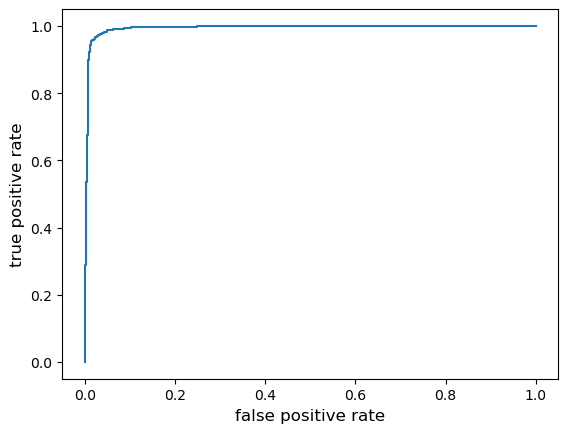

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Make predictions on the train & test set
# y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]
y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC-ROC Score:", auc_roc_score)

# roc_auc_score(y_train, y_train_proba[:, 1])
# roc_auc_score(y_test, y_test_proba[:, 1])

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr,tpr)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

Text(0, 0.5, 'true positive rate')

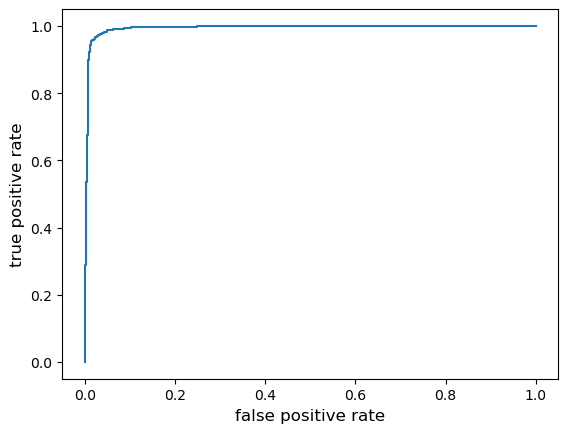

In [24]:
fpr_lg, tpr_lg, thresholds_lg_1 = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr_lg,tpr_lg)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

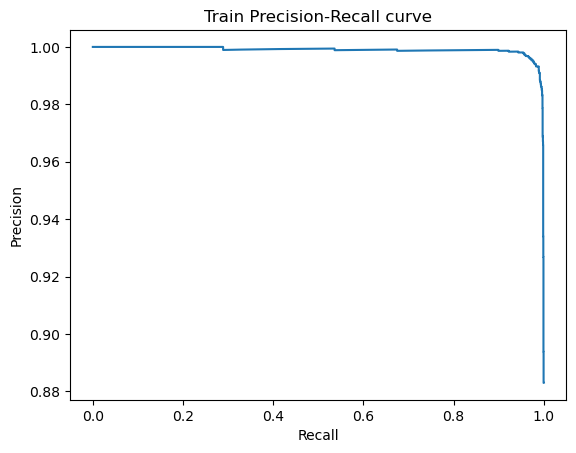

In [25]:
from sklearn.metrics import precision_recall_curve

precision_lg, recall_lg, thresholds_lg_2 = precision_recall_curve(y_test, y_pred_prob_test)
plt.plot(recall_lg, precision_lg)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [26]:
%store fpr_lg
%store tpr_lg
%store thresholds_lg_1
%store precision_lg
%store recall_lg
%store thresholds_lg_2

Stored 'fpr_lg' (ndarray)
Stored 'tpr_lg' (ndarray)
Stored 'thresholds_lg_1' (ndarray)
Stored 'precision_lg' (ndarray)
Stored 'recall_lg' (ndarray)
Stored 'thresholds_lg_2' (ndarray)
